# V4 모델 외부 데이터 추론 코드 (모델 .h 로드시)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 외부 Test 데이터 제네레이터 클래스 정의

xBD 이외의 모든 데이터를 테스트할 수 있게 따로 추론용 제네레이터 클래스를 만들었습니다.

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import os
import math

# 추론용 데이터 제너레이터 클래스 정의
class xBDInference(keras.utils.Sequence):
    def __init__(self, batch_size, img_size, input_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths

    def __len__(self):
        return math.ceil(len(self.input_img_paths) / self.batch_size)

    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i: i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype='float32')
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        return x



In [4]:
from tensorflow.keras.models import load_model

# .h5 파일로부터 모델 로드
model = load_model('/content/xbd_segmentation_v4.h5')


## 외부 Test 데이터셋 받아오기 (예시: dacon 인공위성 이미지)

In [5]:
!unzip -q "/content/drive/MyDrive/실증적 4조 sibas/open.zip" -d "/content"

In [6]:
# 이미지 경로 설정 및 제너레이터 초기화
input_dir = 'test_img'
img_size = (224, 224)
batch_size = 1

input_img_paths = sorted([
    os.path.join(input_dir, fname)
    for fname in os.listdir(input_dir)
    if fname.endswith('.png')
])

In [7]:
test_input_img_paths = input_img_paths[:5000]

test_gen = xBDInference(batch_size, img_size, test_input_img_paths)

predictions = model.predict(test_gen)

5000/5000 [==============================] - 95s 18ms/step


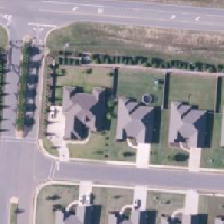

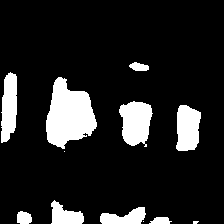

In [26]:
# 결과 시각화
import PIL
from IPython.display import Image

def display_mask(i):
  mask = np.argmax(predictions[i], axis=-1)
  mask = np.expand_dims(mask, axis=-1)
  img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
  display(img)

# 예측 결과 출력
i = 0

display(Image(filename=test_input_img_paths[i]))
display_mask(i)
